In [1]:
###Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle


import warnings
warnings.filterwarnings('ignore')

In [2]:
##Data collection from csv file
insurancedataset=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")

In [3]:
#print first 5 rows 
insurancedataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
###find the no of rows and coloumn
insurancedataset.shape

(1338, 7)

In [5]:
#get more info about dataset
insurancedataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking missing values
insurancedataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Data analysis
#statistical measure for the dataset

insurancedataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


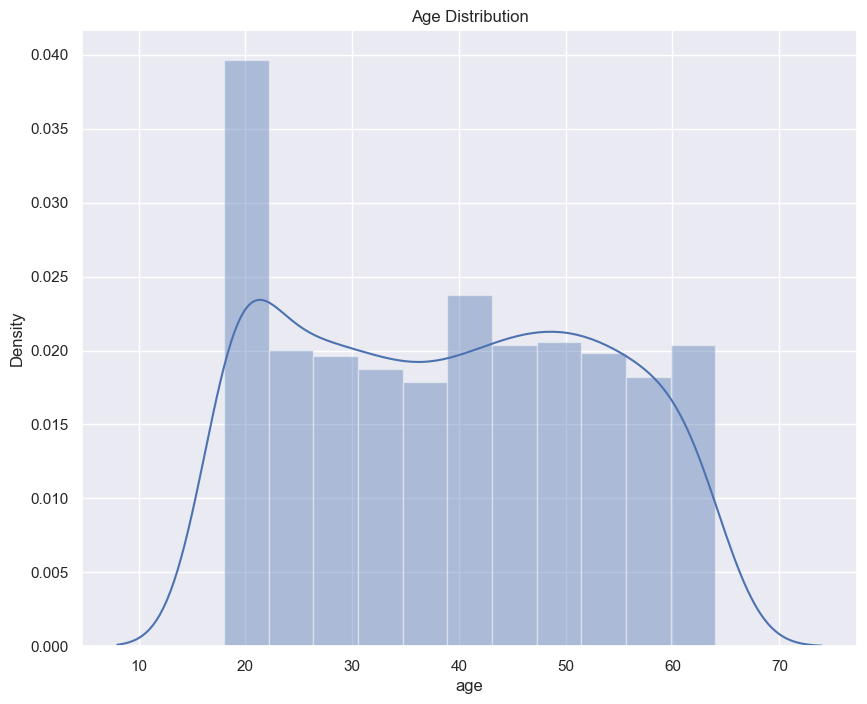

In [8]:
#Data visualization

sns.set()
plt.figure(figsize=(10,8))
sns.distplot(insurancedataset['age'])
plt.title('Age Distribution')
plt.show()

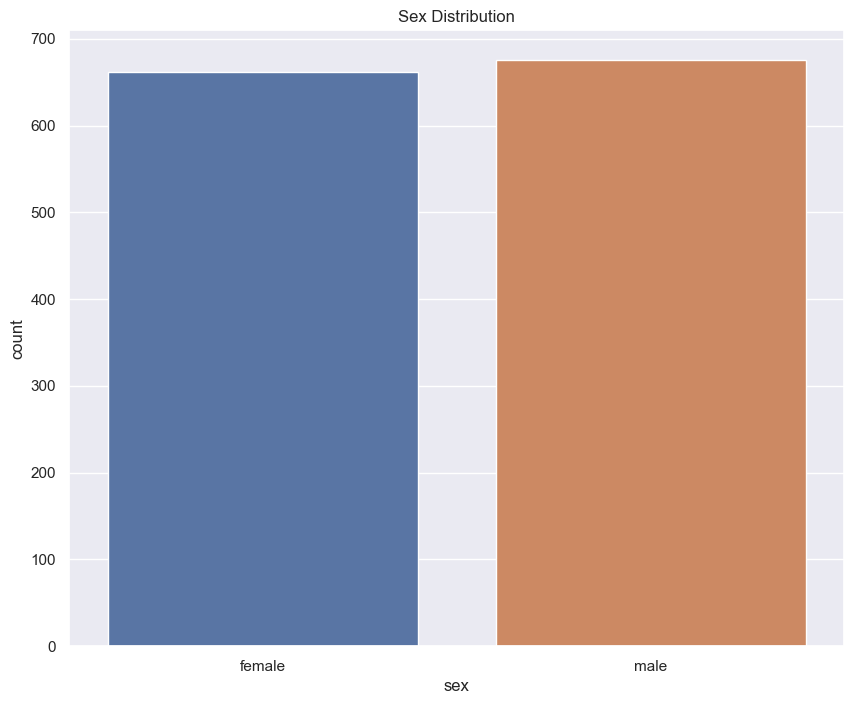

In [9]:
#Gender coloumn

plt.figure(figsize=(10,8))
sns.countplot(x='sex',data=insurancedataset)
plt.title('Sex Distribution')
plt.show()


### sex distribution is equal

In [10]:
insurancedataset['sex'].value_counts() 

male      676
female    662
Name: sex, dtype: int64

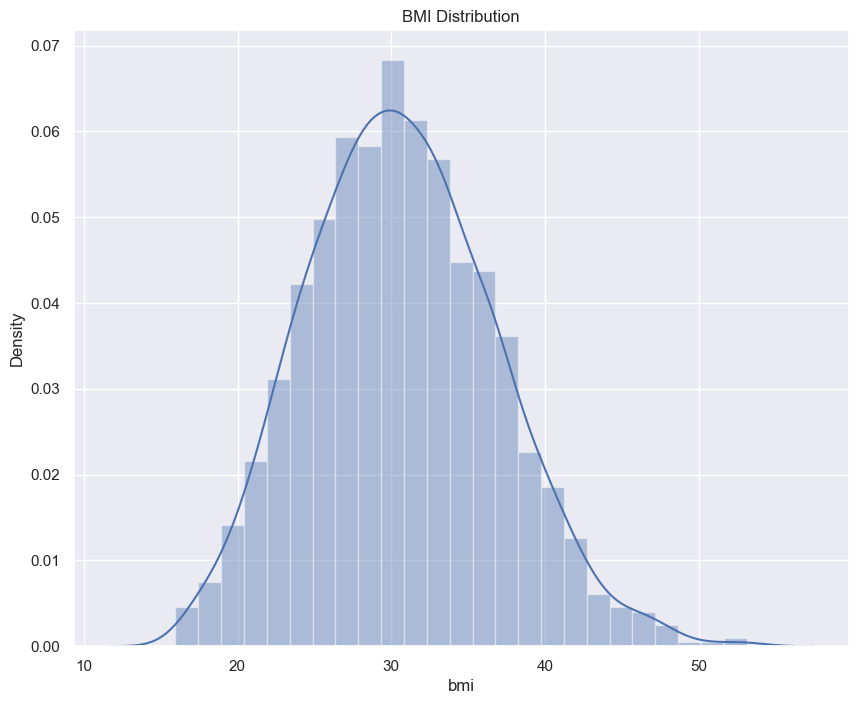

In [11]:
##BMI Distribution

plt.figure(figsize=(10,8))
sns.distplot(insurancedataset['bmi'])
plt.title('BMI Distribution')
plt.show()

##It is like normal distribution


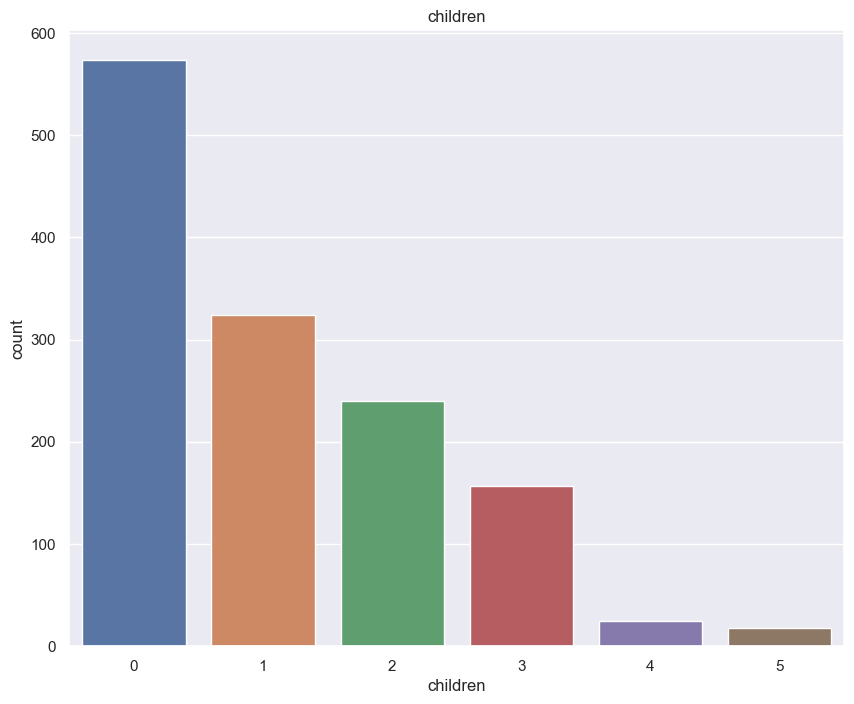

In [12]:
##children coloumn
plt.figure(figsize=(10,8))
sns.countplot(x='children',data=insurancedataset)
plt.title('children')
plt.show()


In [13]:
insurancedataset['children'].value_counts()  #no.of children for each people

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

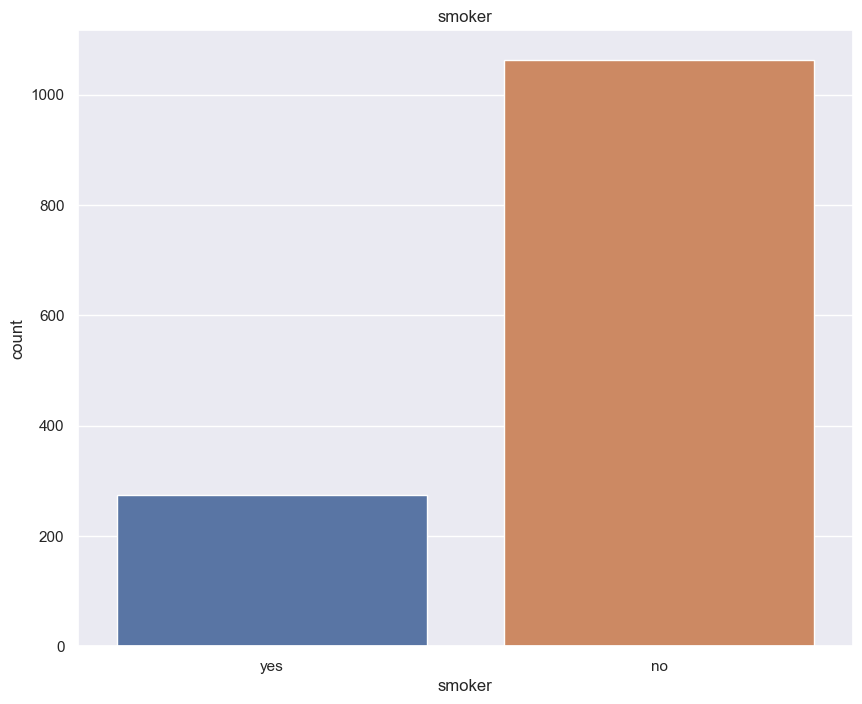

In [14]:
##Smoker coloumn

plt.figure(figsize=(10,8))
sns.countplot(x='smoker',data=insurancedataset)
plt.title('smoker')
plt.show()



In [15]:
insurancedataset['smoker'].value_counts() 

no     1064
yes     274
Name: smoker, dtype: int64

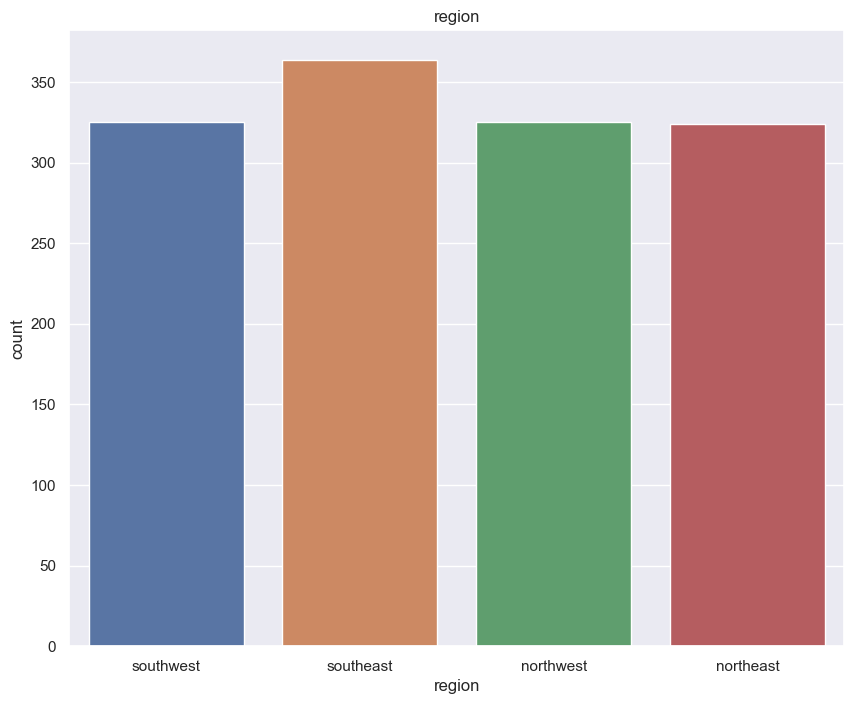

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x='region',data=insurancedataset)
plt.title('region')
plt.show()


###values are similar except southeast

In [17]:
insurancedataset['region'].value_counts() 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

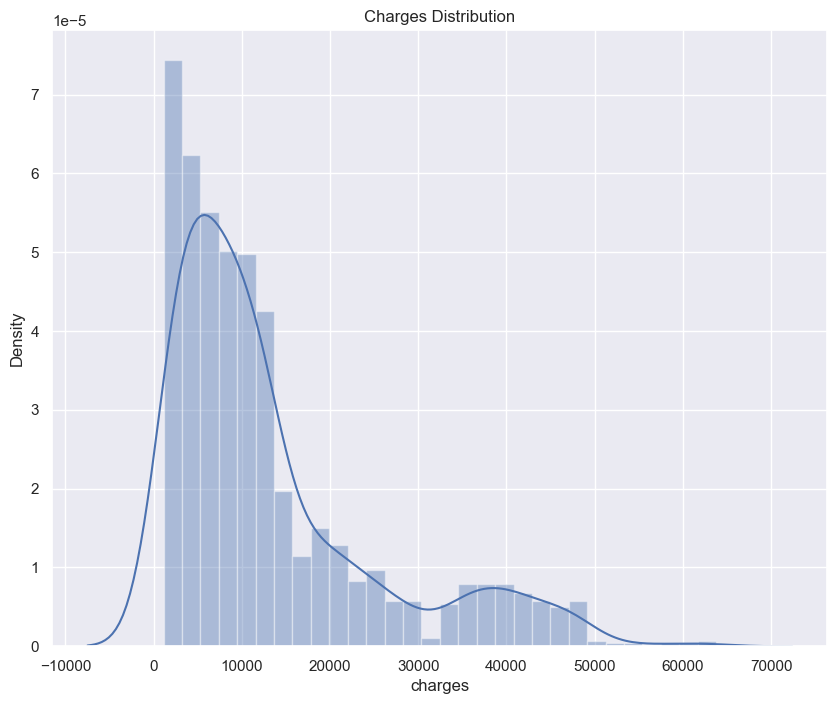

In [18]:
#distribution for charges
plt.figure(figsize=(10,8))
sns.distplot(insurancedataset['charges'])
plt.title('Charges Distribution')
plt.show()


###lot od data distributed in 10000 and lesser in 20000,30000,40000

In [19]:
###Encoding the categorical features

insurancedataset.replace({'sex':{'male':0,'female':1}},inplace=True)

insurancedataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

insurancedataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [20]:
insurancedataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


###now we can see catecorigal coloumn are in numbers

In [21]:
###splitting feature and target variable

x=insurancedataset.drop('charges',axis=1)
y=insurancedataset['charges']


In [22]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [23]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [24]:
###splitting the data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=41)

In [25]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1003, 6) (335, 6)


In [26]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
###prediction on training data
training_data_prediction=regressor.predict(x_train)

In [28]:
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.7570972212505535


In [29]:
##Prediction on test data
test_data_prediction=regressor.predict(x_test)

In [30]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7171136347441578


#conclusion : if there is huge difference in training and testing data then the model is overfit
#here ther is no huge difference

In [31]:
#Buiding a cost Prediction

inputdata=(31,1,25.74,0,1,0)

inputdata_as_numpyarray=np.asarray(inputdata)

inputdatareshaped=inputdata_as_numpyarray.reshape(1,-1)

prediction=regressor.predict(inputdatareshaped)
print('The Insurance cost is:',prediction)

The Insurance cost is: [3465.56226042]
